# 3. Classification

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import StratifiedKFold

data: pd.DataFrame = pd.read_csv('heart_failure_clinical_records_dataset_after_preparation_balanced.csv', sep=';')
data

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    0.636364                  0.071319           0.090909   0.290823   
1    0.272727                  1.000000           0.363636   0.288833   
2    0.454545                  0.015693           0.090909   0.165960   
3    0.181818                  0.011227           0.090909   0.224148   
4    0.454545                  0.017479           0.090909   0.365984   
..        ...                       ...                ...        ...   
401  0.191214                  0.071319           0.346044   0.361392   
402  0.393064                  0.187083           0.138811   0.327651   
403  0.663123                  0.051869           0.319216   0.199377   
404  0.678566                  0.035355           0.237029   0.287376   
405  0.198111                  0.095344           0.090909   0.350195   

     serum_creatinine  serum_sodium      time  anaemia  diabetes  \
0            0.157303      0.485714  0.000000      0.0       0.0   
1            0.067416      0.657143  0.007117      0.0       0.0   
2            0.089888      0.457143  0.010676      0.0       0.0   
3            0.157303      0.685714  0.010676      1.0       0.0   
4            0.247191      0.085714  0.014235      1.0       1.0   
..                ...           ...       ...      ...       ...   
401          0.167754      0.798697  0.248656      0.0       0.0   
402          0.097575      0.672264  0.726395      0.0       0.0   
403          0.144085      0.526706  0.469910      0.0       0.0   
404          0.414122      0.540813  0.072566      1.0       0.0   
405          0.074822      0.651983  0.173783      0.0       0.0   

     high_blood_pressure  sex   smoking  DEATH_EVENT  
0                    1.0  1.0  0.000000          1.0  
1                    0.0  1.0  0.000000          1.0  
2                    0.0  1.0  1.000000          1.0  
3                    0.0  1.0  0.000000          1.0  
4                    0.0  0.0  0.000000          1.0  
..                   ...  ...       ...          ...  
401                  0.0  1.0  0.000000          1.0  
402                  0.0  1.0  0.000000          1.0  
403                  0.0  0.0  0.000000          1.0  
404                  1.0  1.0  0.535775          1.0  
405                  1.0  1.0  1.000000          1.0  

[406 rows x 13 columns]

## 3.0. Training Models

---

### Training Models

---

#### StratifiedKFold function
After loading the data, in data dataframe, we need to separate the target variable which is the DEATH_EVENT from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves

In [2]:
target = 'DEATH_EVENT'
positive = True
negative = False
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

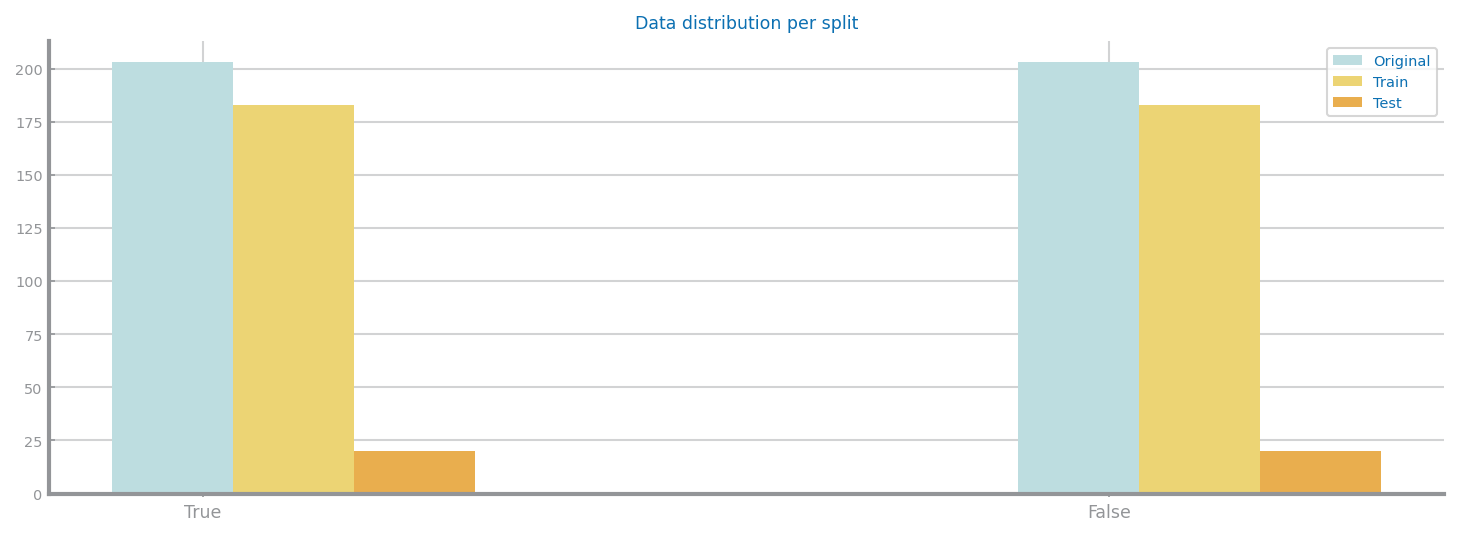

In [3]:
np.random.seed(1)
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, y)

splits=[]

for train_index, test_index in skf.split(X, y):
    splits.append({'X_train': X[train_index], 'X_test': X[test_index],
                  'y_train': y[train_index], 'y_test': y[test_index]})

values['Train'] = [len(np.delete(y[train_index], np.argwhere(y[train_index]==negative))), len(np.delete(y[train_index], np.argwhere(y[train_index]==positive)))]
values['Test'] = [len(np.delete(y[test_index], np.argwhere(y[test_index]==negative))), len(np.delete(y[test_index], np.argwhere(y[test_index]==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per split', showXTickLabels=True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

## 3.3. Decision Trees

---

<Figure size 600x450 with 0 Axes>

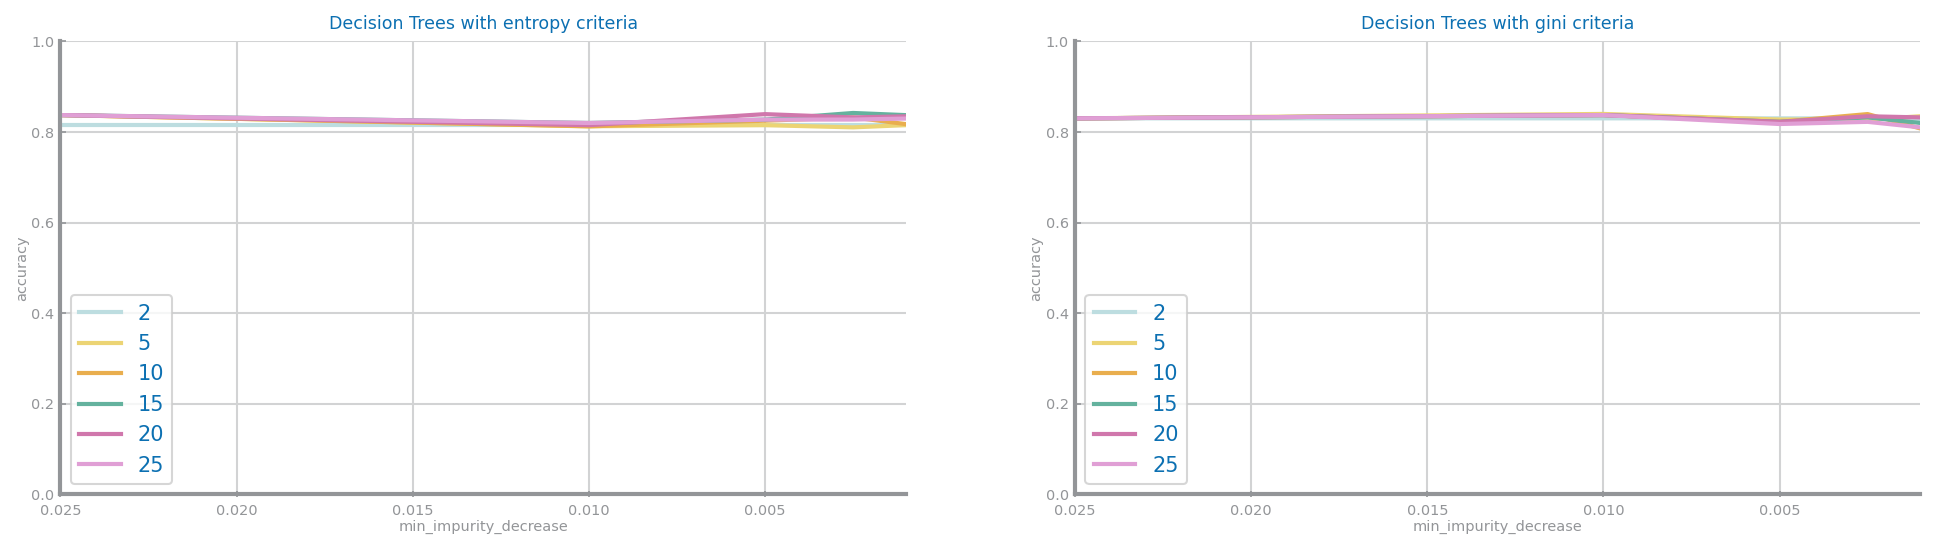

Best results achieved in split 3 with entropy criteria, depth=10 and min_impurity_decrease=0.002500 ==> accuracy=0.926829
Best results per split:
	Split 0: entropy criteria, depth=20 and min_impurity_decrease=0.005000 ==> accuracy=0.853659
	Split 1: gini criteria, depth=5 and min_impurity_decrease=0.010000 ==> accuracy=0.902439
	Split 2: entropy criteria, depth=10 and min_impurity_decrease=0.001000 ==> accuracy=0.878049
	Split 3: entropy criteria, depth=10 and min_impurity_decrease=0.002500 ==> accuracy=0.926829
	Split 4: entropy criteria, depth=10 and min_impurity_decrease=0.002500 ==> accuracy=0.902439
	Split 5: gini criteria, depth=10 and min_impurity_decrease=0.002500 ==> accuracy=0.926829
	Split 6: entropy criteria, depth=5 and min_impurity_decrease=0.025000 ==> accuracy=0.825000
	Split 7: entropy criteria, depth=10 and min_impurity_decrease=0.005000 ==> accuracy=0.875000
	Split 8: gini criteria, depth=2 and min_impurity_decrease=0.025000 ==> accuracy=0.900000
	Split 9: entropy cr

In [4]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']

best = ('',  0, 0.0) # (criteria, max depth, min impurity decrease)
best_tree = None
last_best = 0 # accuracy
best_split = None
best_spli = 0

NUM_SPLITS = len(splits)
split_best = [('',  0, 0.0)] * NUM_SPLITS
split_best_tree = [None] * NUM_SPLITS
split_last_best = [0] * NUM_SPLITS

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        values[d] = []
        for i in range(len(min_impurity_decrease)):
            values[d].append(0)
    for spli in range(NUM_SPLITS):
        split = splits[spli]
        for d in max_depths:
            yvalues = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(split['X_train'], split['y_train'])
                split['prdY'] = tree.predict(split['X_test'])
                yvalues.append(metrics.accuracy_score(split['y_test'], split['prdY']))
                # Check if accuracy is better than best overall
                if yvalues[-1] > last_best:
                    best = (f, d, imp)
                    last_best = yvalues[-1]
                    best_tree = tree
                    best_split = split
                    best_spli = spli
                # Check if accuracy is better than best in current split
                if yvalues[-1] > split_last_best[spli]:
                    split_best[spli] = (f, d, imp)
                    split_last_best[spli] = yvalues[-1]
                    split_best_tree[spli] = tree
            # Increment total accuracy for current (max_depth, min_impurity decrease)
            for i in range(len(yvalues)):
                values[d][i] += yvalues[i]
    # Normalize
    for v in values:
        for i in range(len(values[v])):
            values[v][i] /= NUM_SPLITS
            
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)
plt.show()
print('Best results achieved in split %d with %s criteria, depth=%d and min_impurity_decrease=%f ==> accuracy=%f'%(best_spli, best[0], best[1], best[2], last_best))

print('Best results per split:')
for i in range(len(splits)):
    print('\tSplit %d: %s criteria, depth=%d and min_impurity_decrease=%f ==> accuracy=%f' % (i, *split_best[i], split_last_best[i]))

Split 0


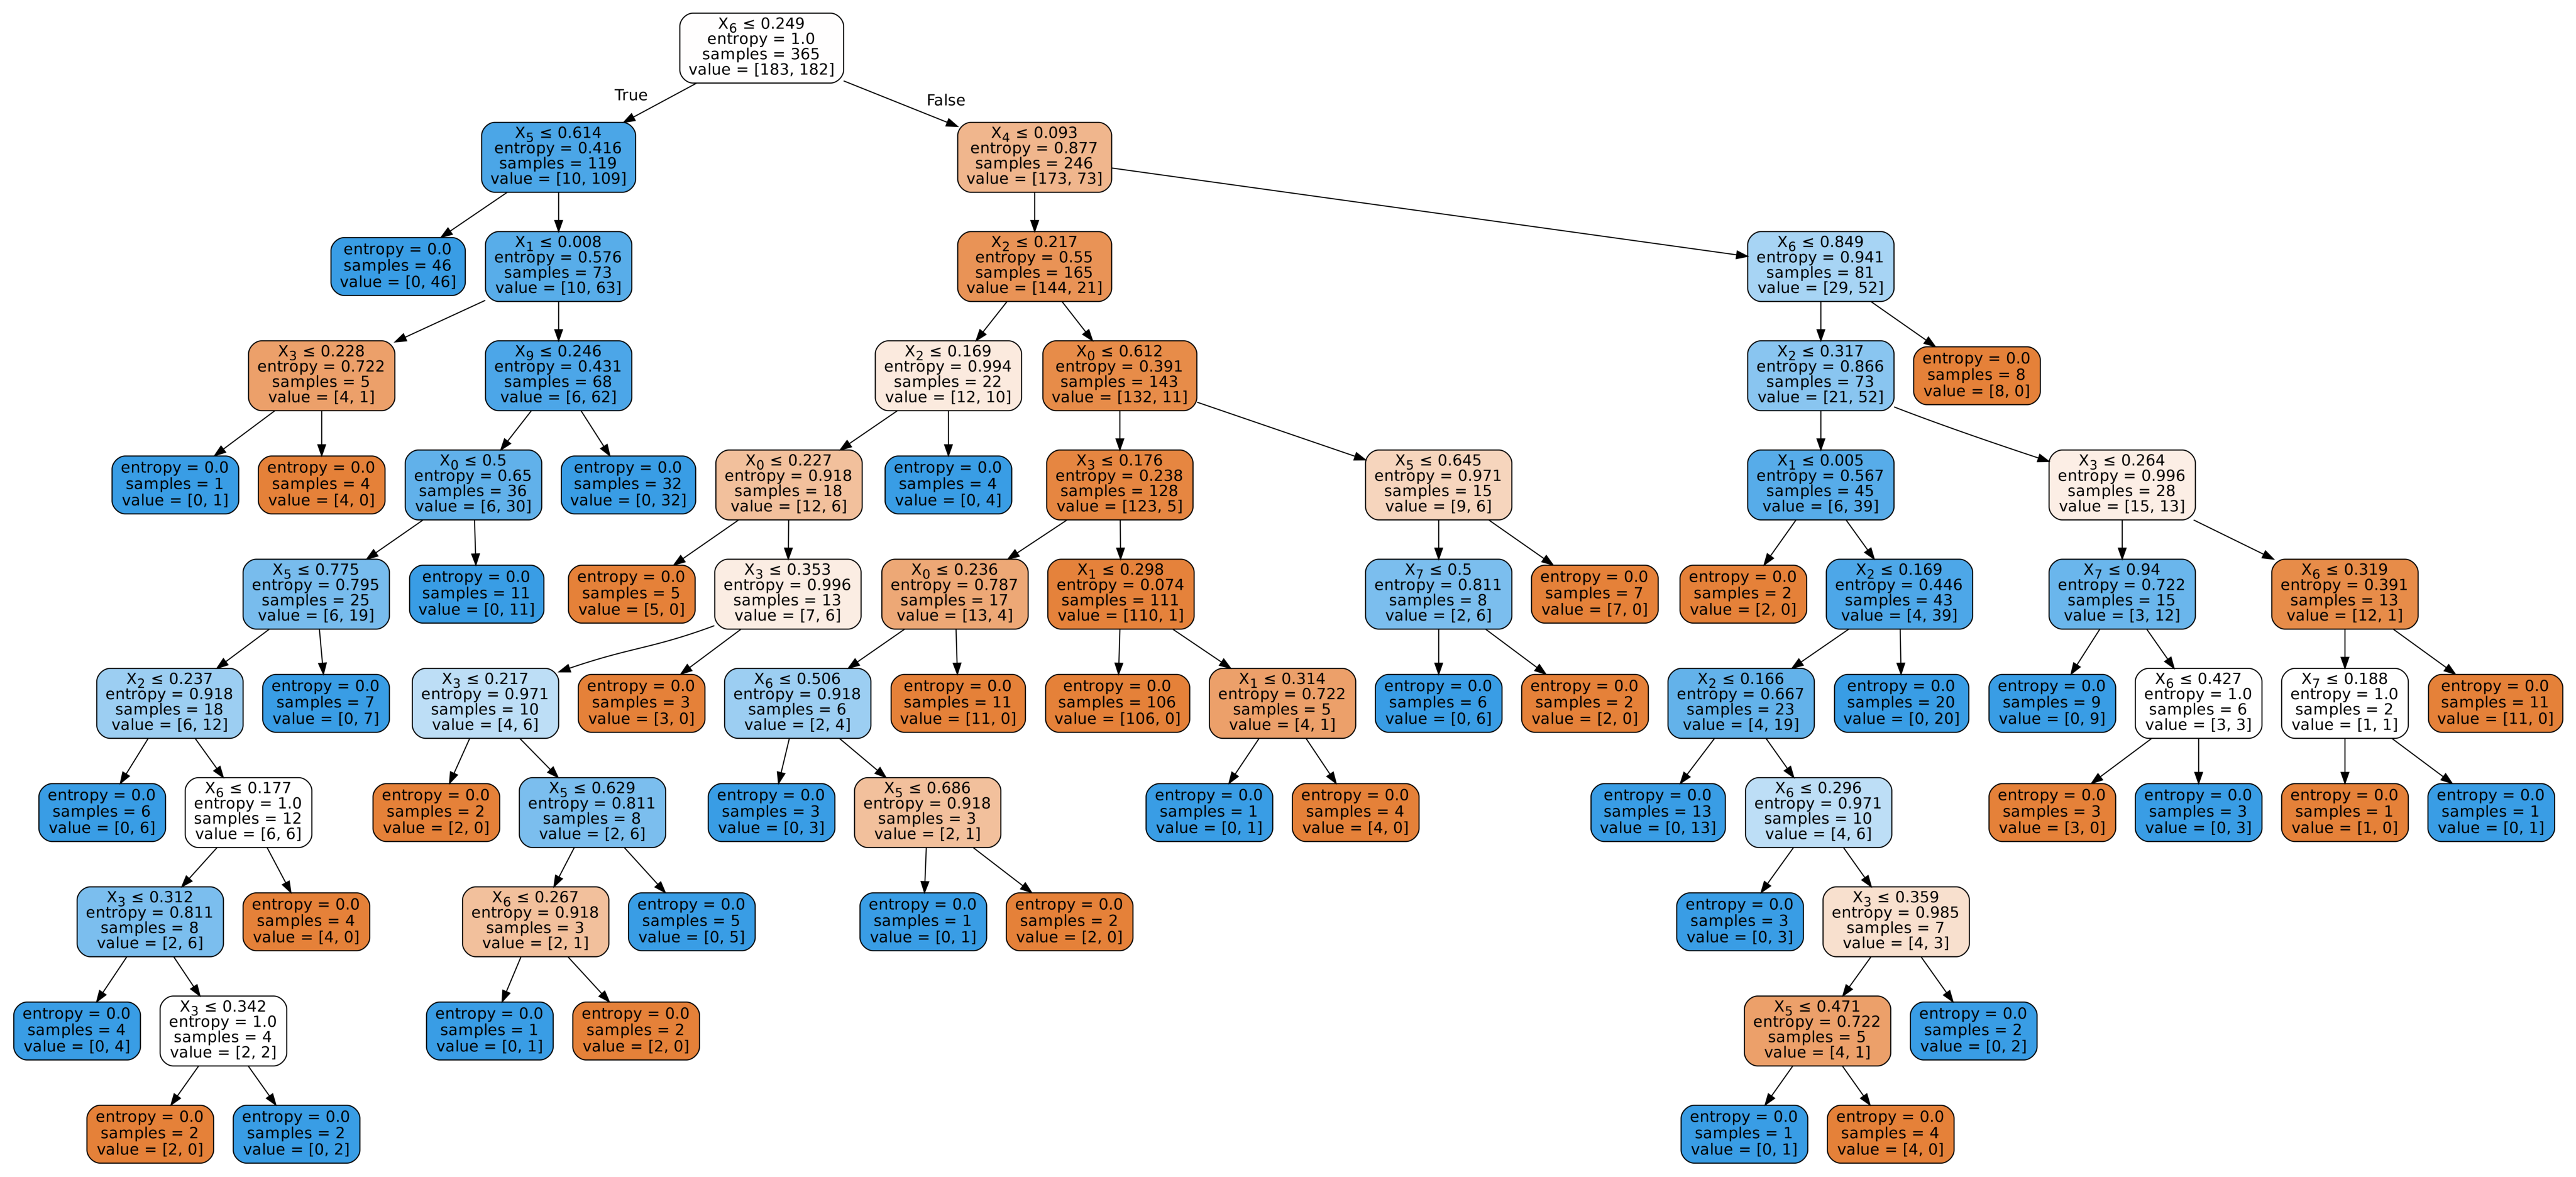

Split 1


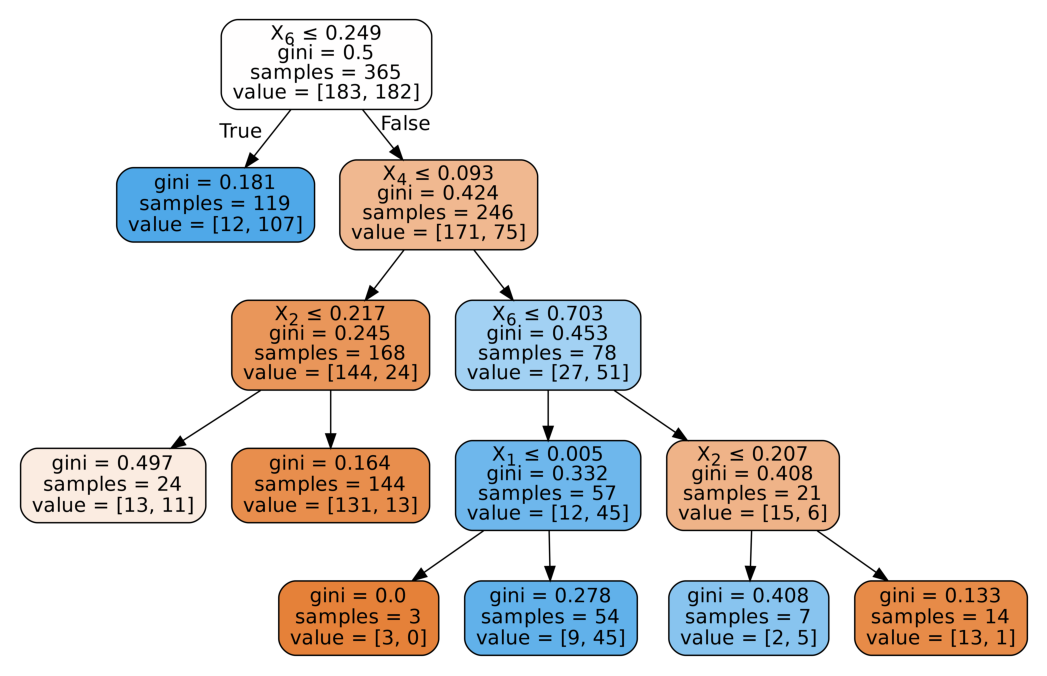

Split 2


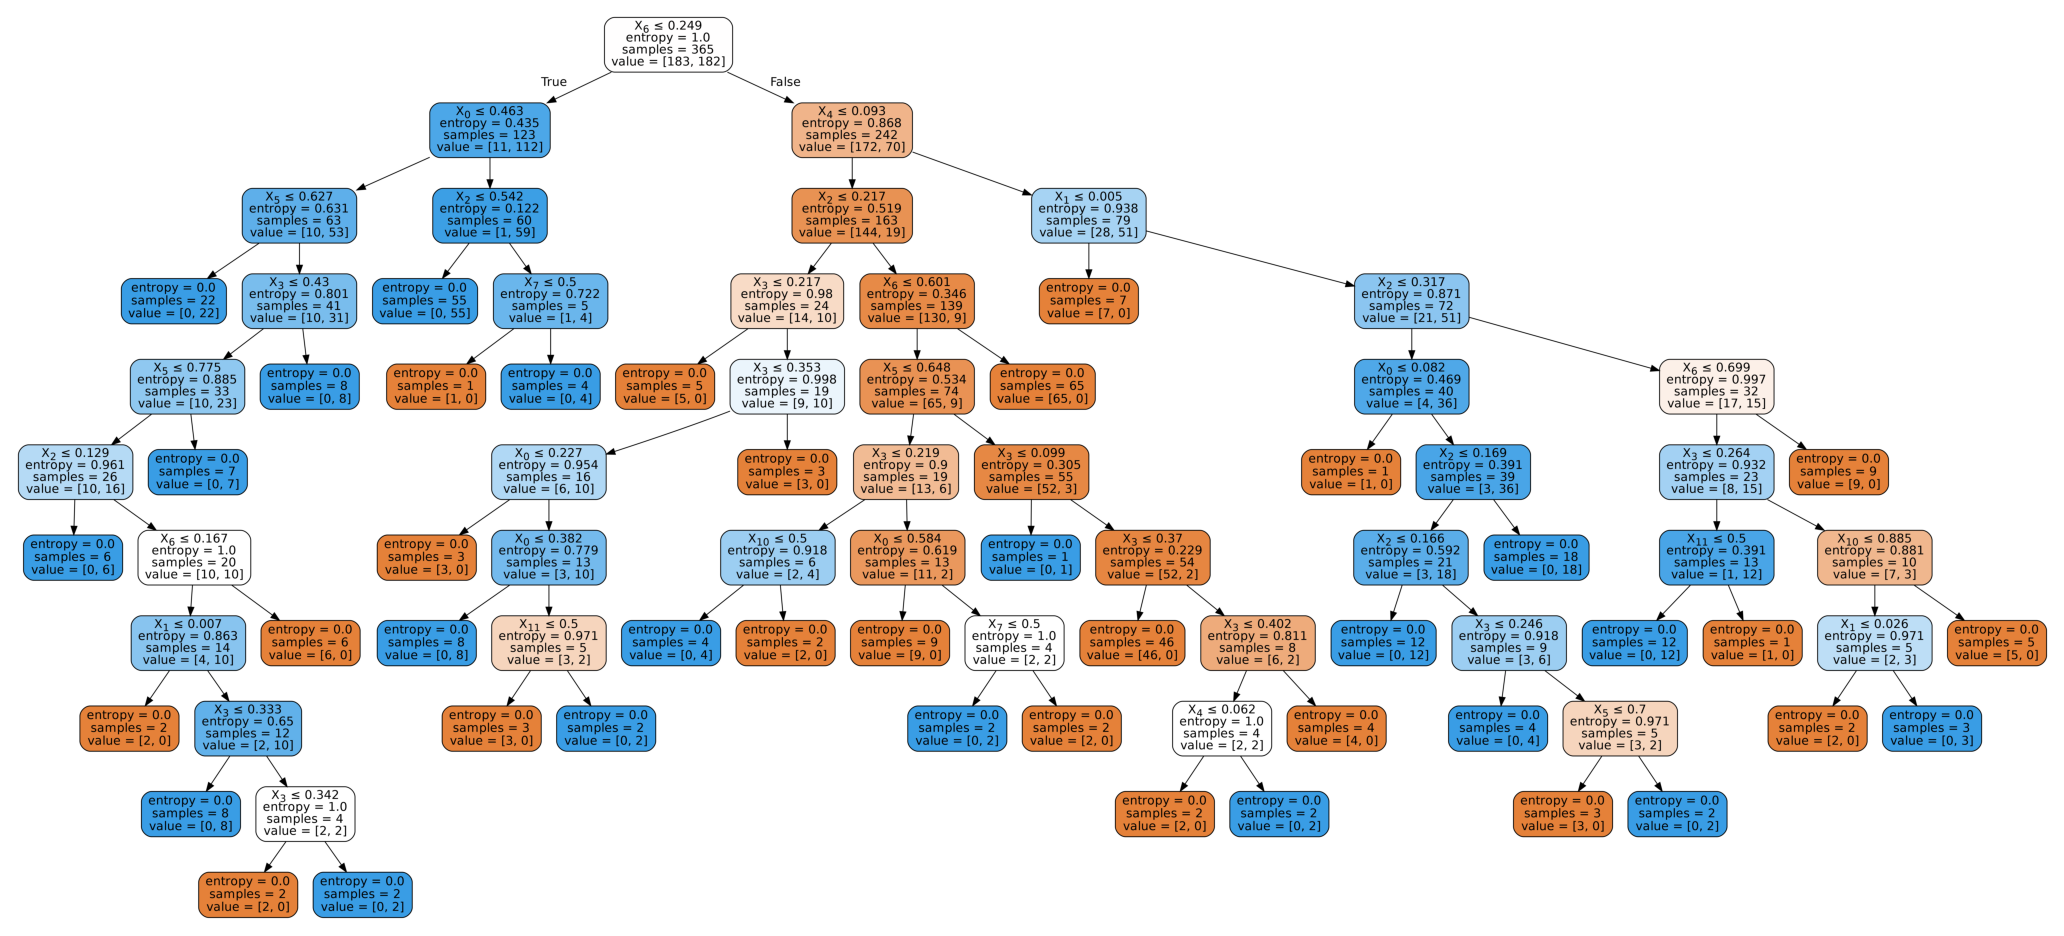

Split 3


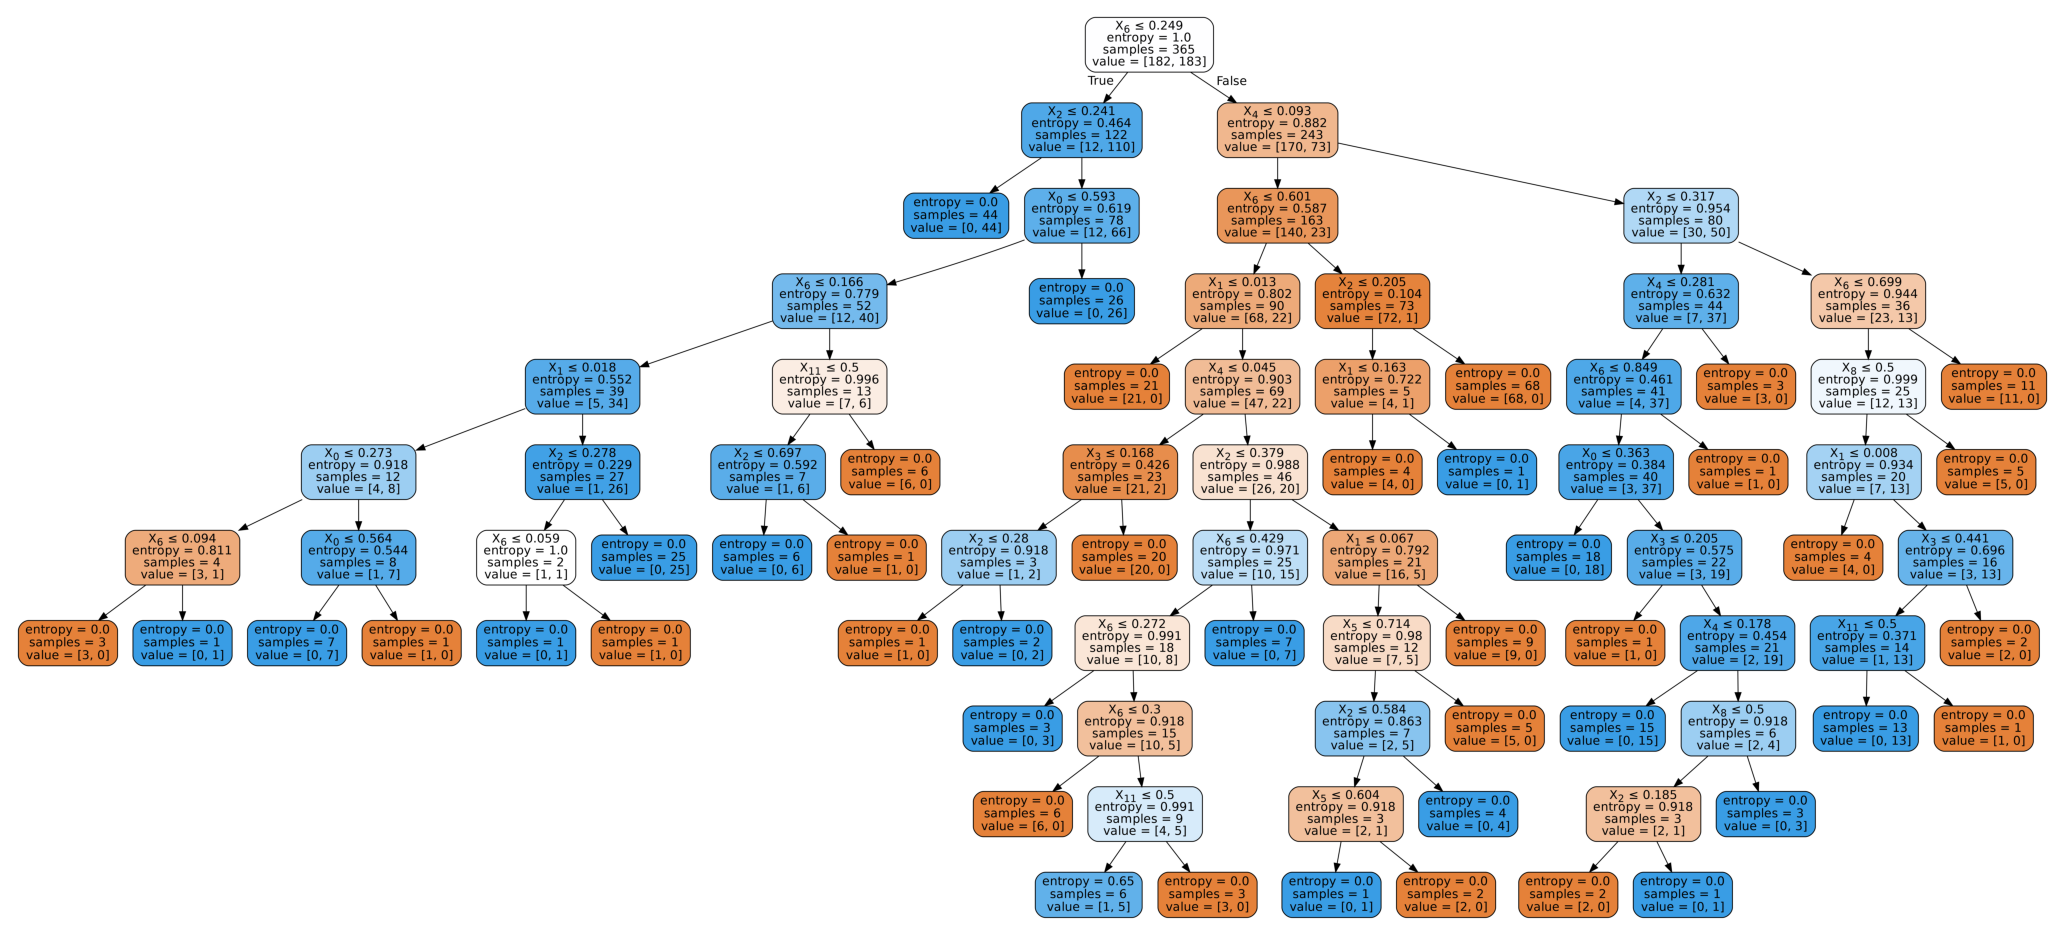

Split 4


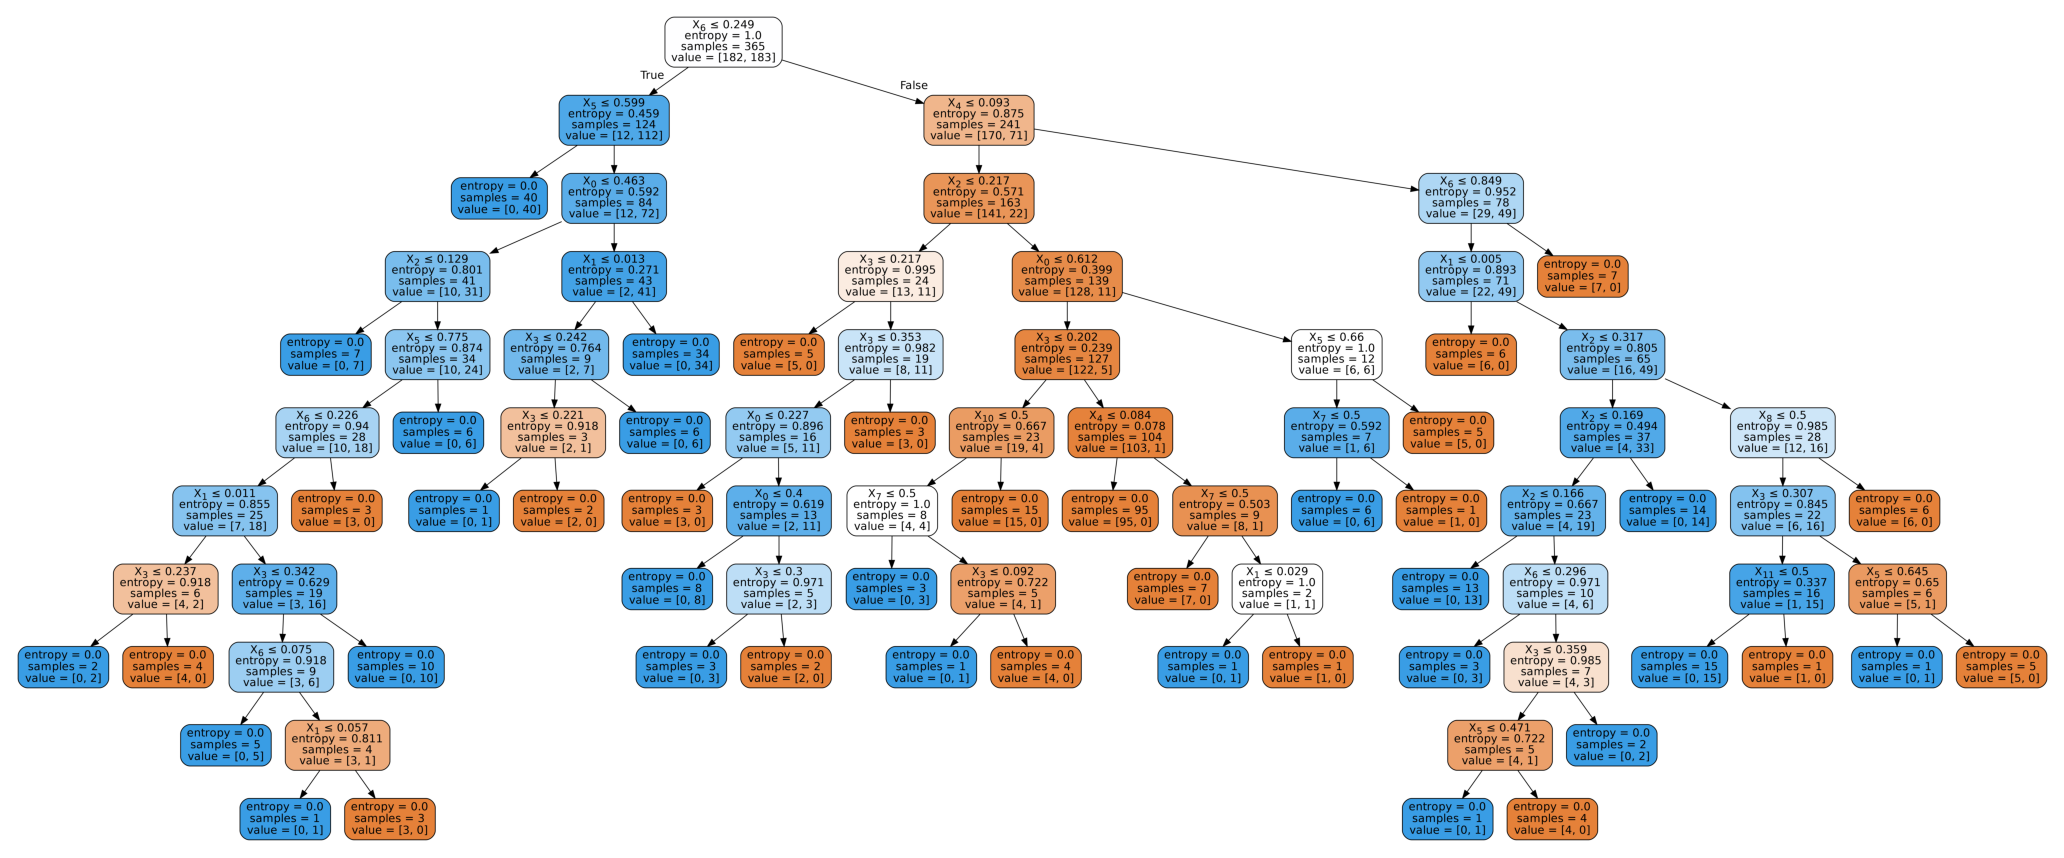

Split 5


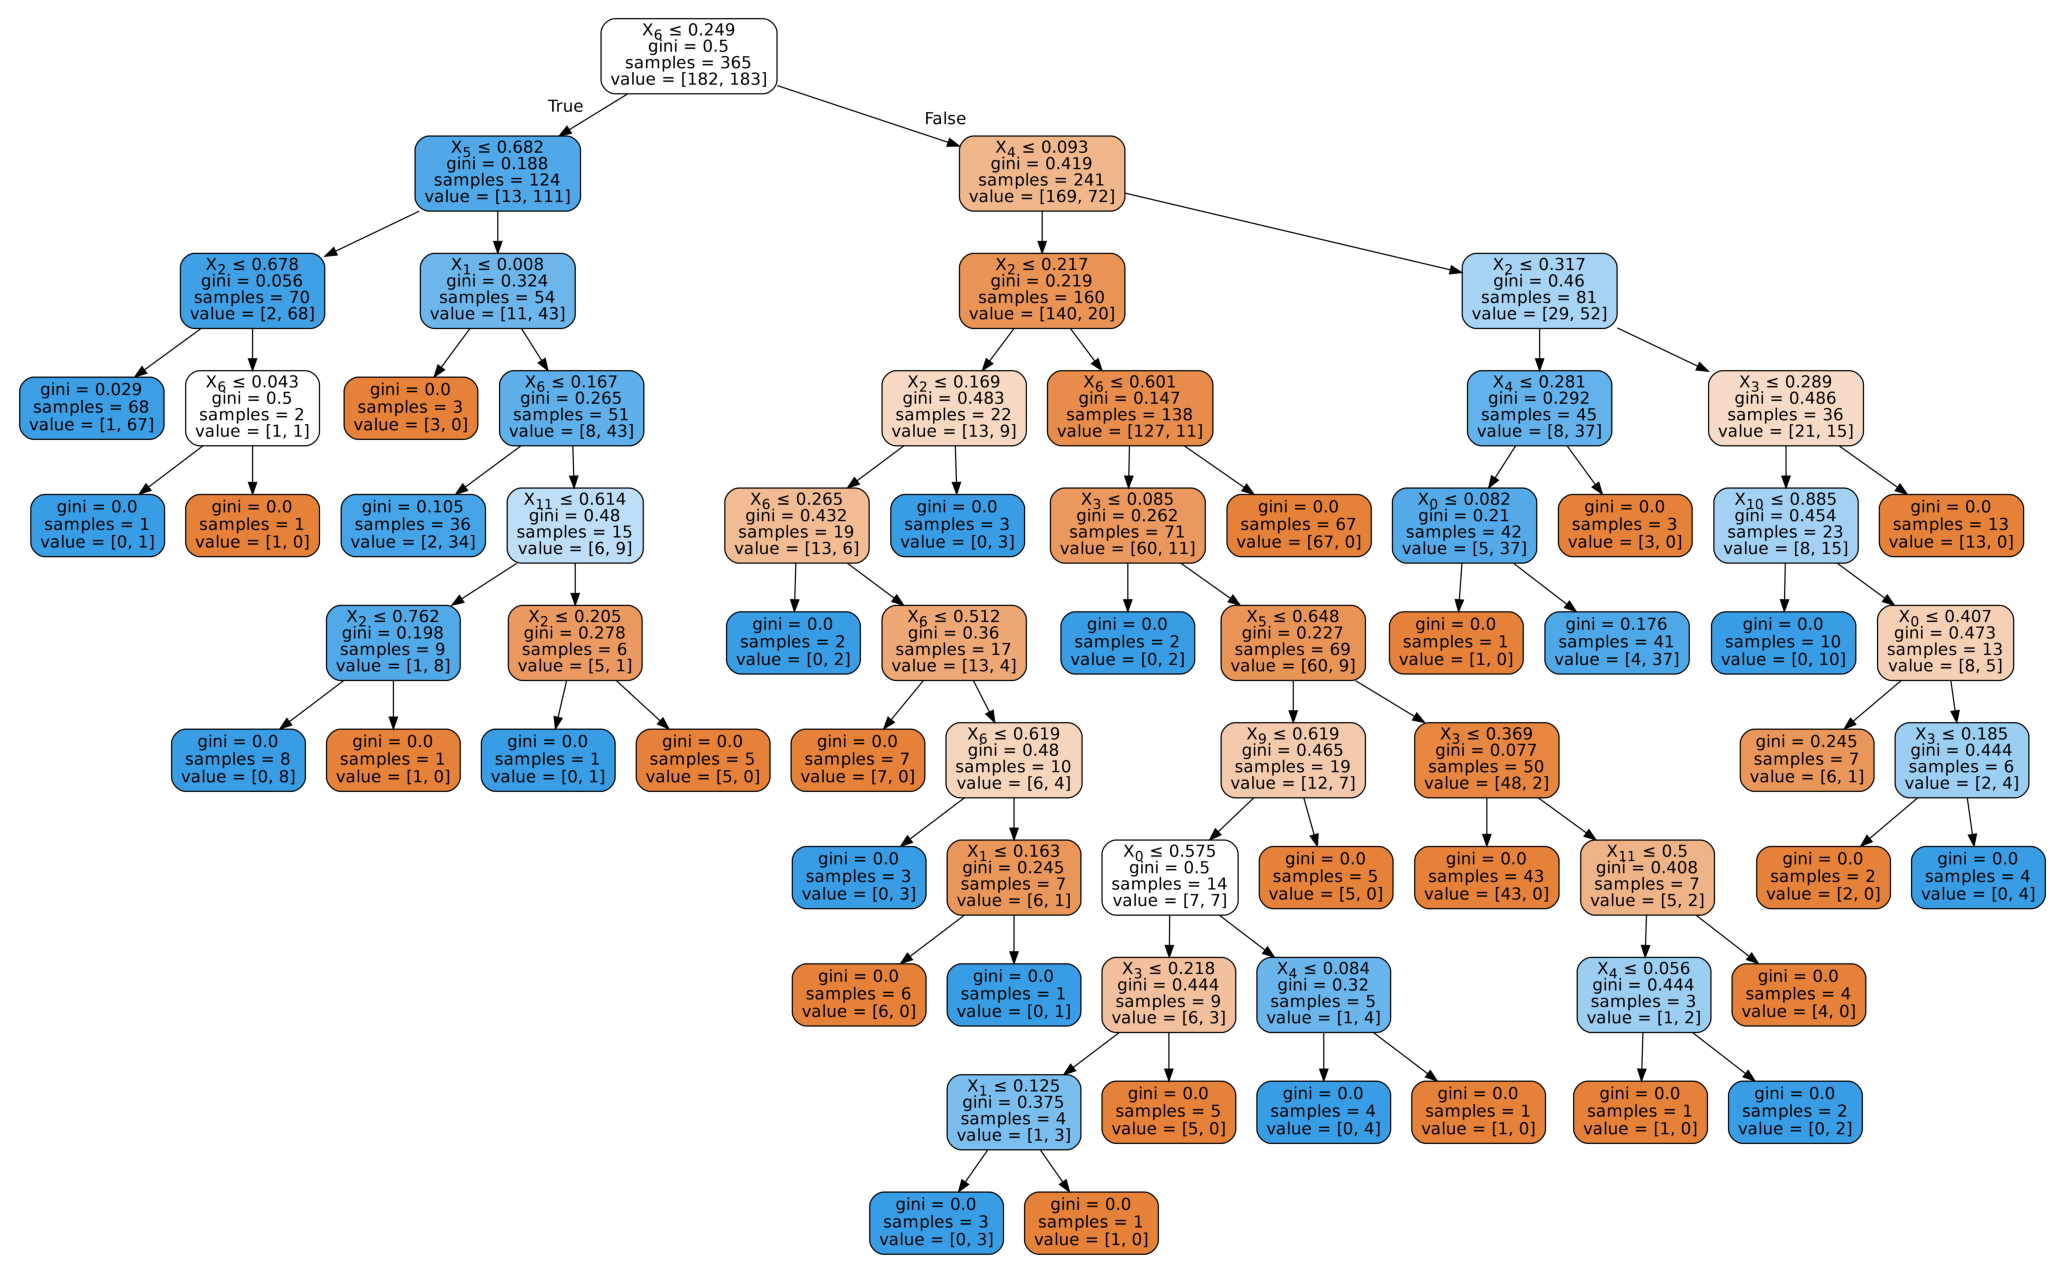

Split 6


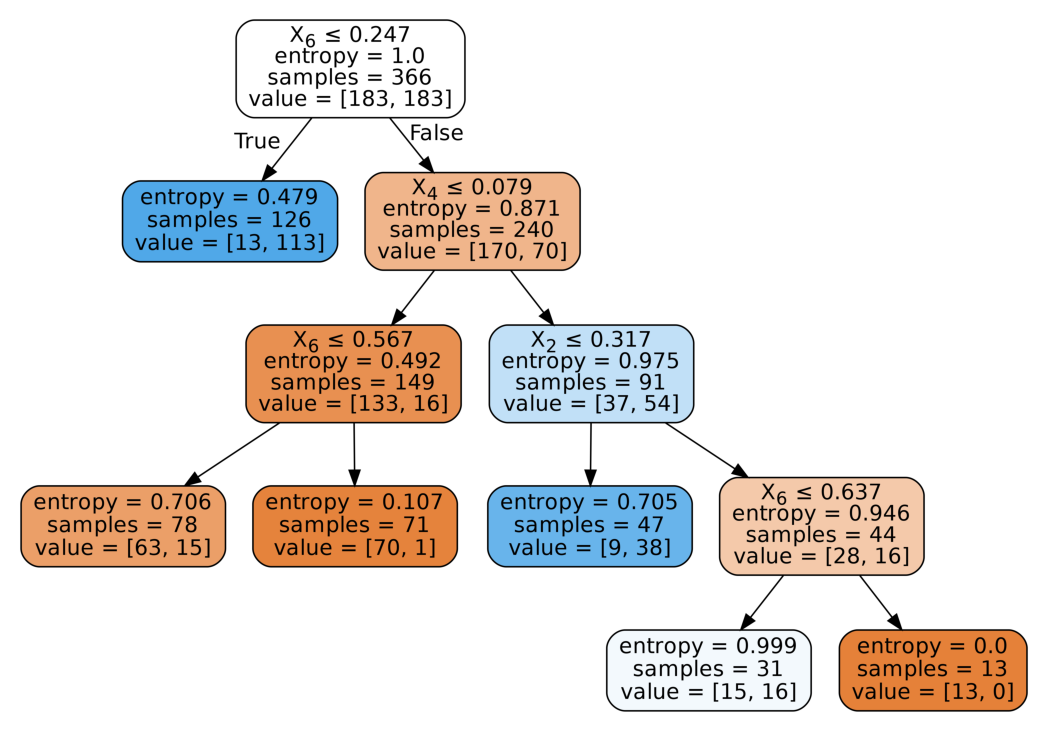

Split 7


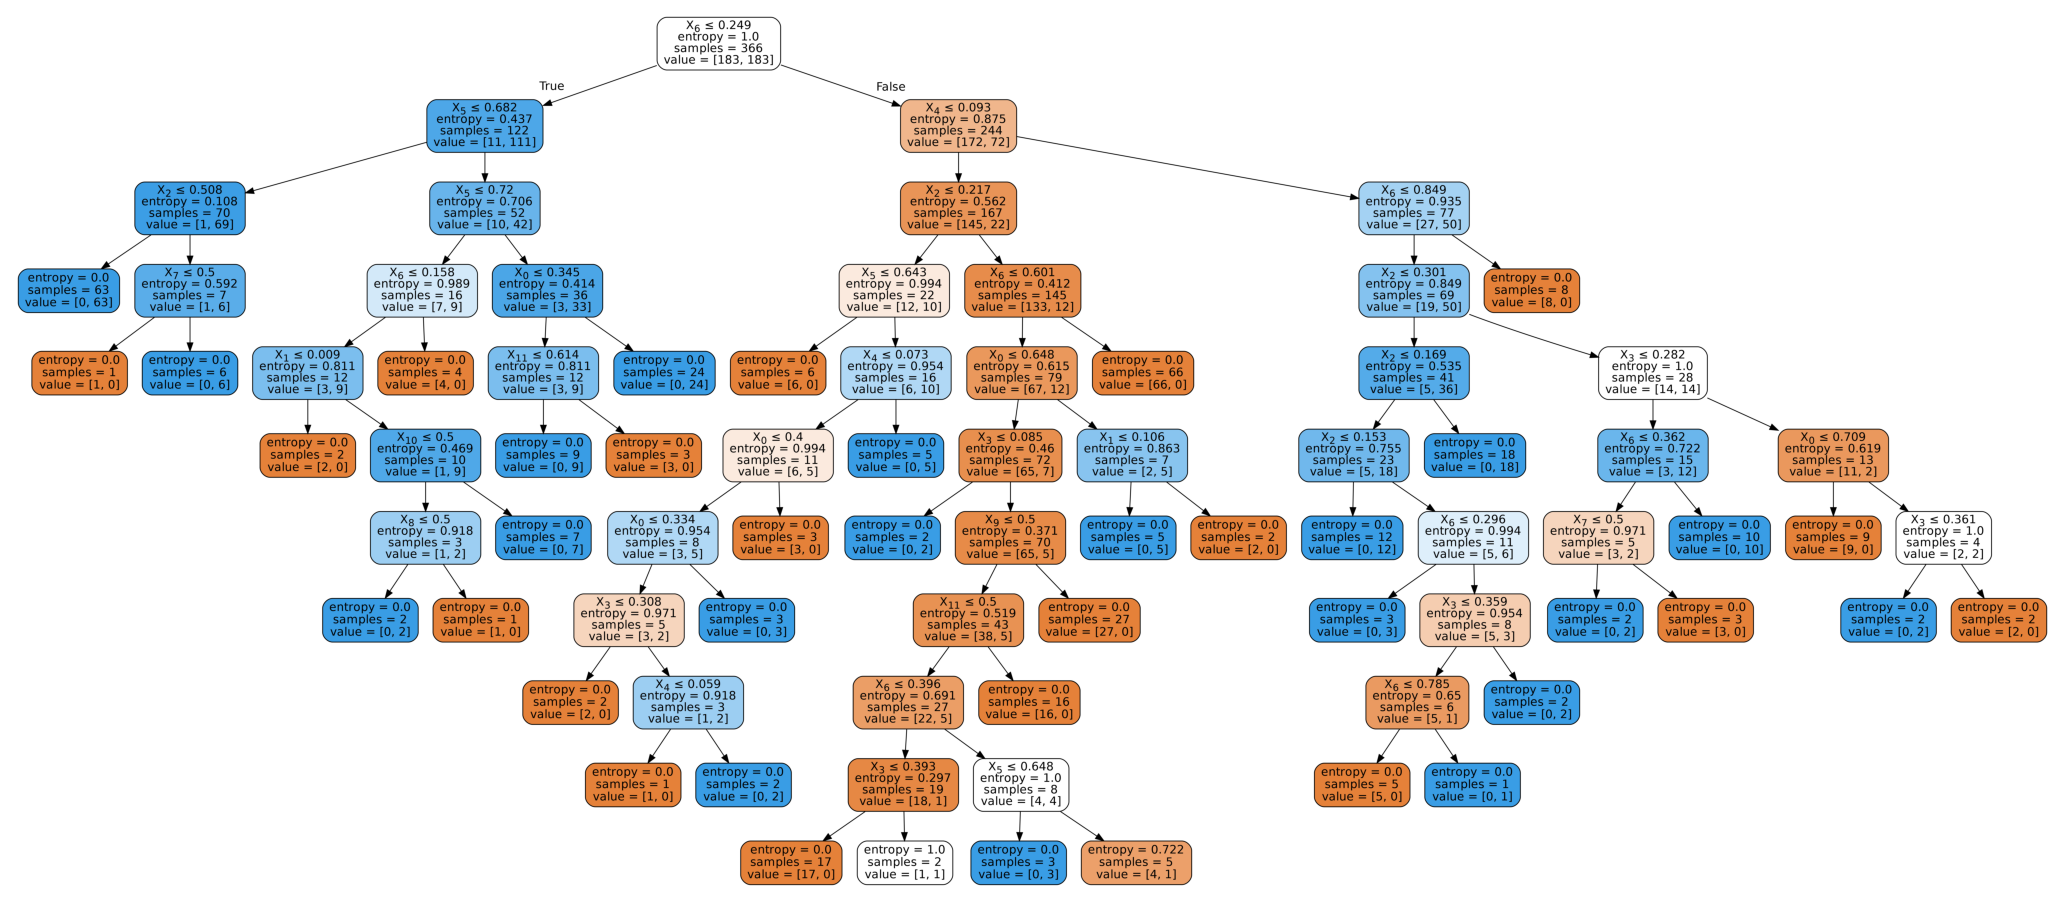

Split 8


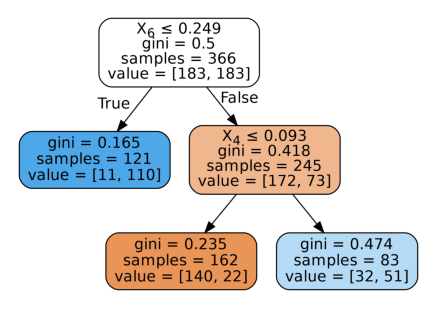

Split 9


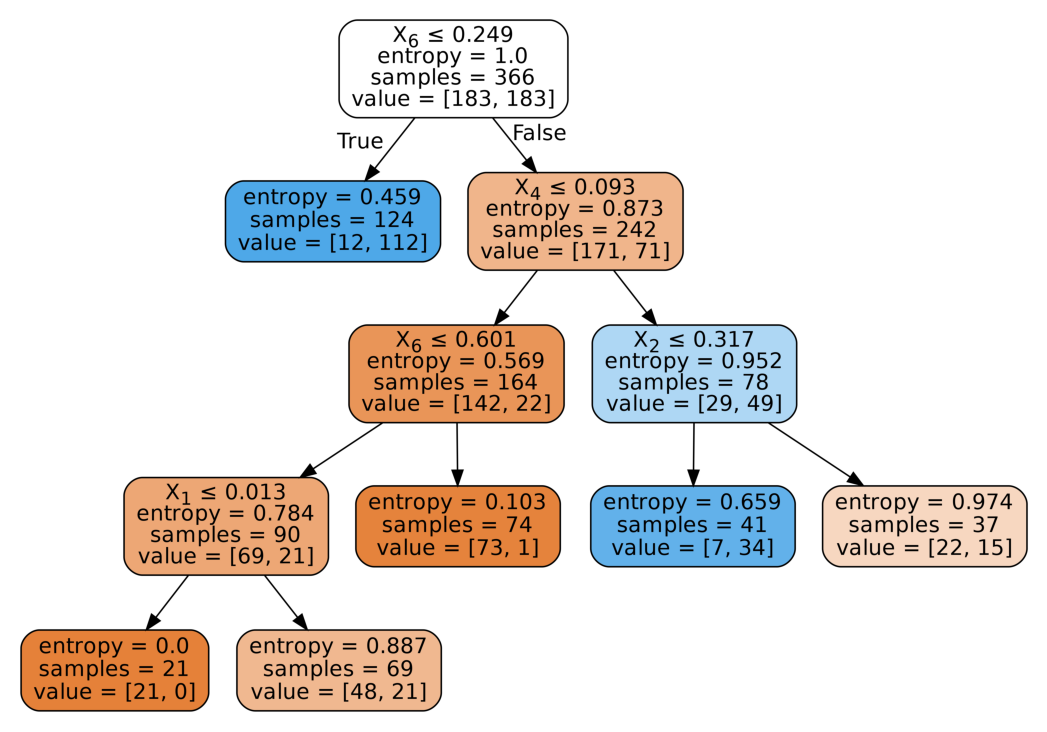

In [5]:
from sklearn.tree import export_graphviz

for i in range(NUM_SPLITS):
    print("Split %d" % i)
    dot_data = export_graphviz(split_best_tree[i], out_file=('dtree%d.dot' % i) , filled=True, rounded=True, special_characters=True)
    # Convert to png
    from subprocess import call
    call(['dot', '-Tpng', 'dtree%d.dot' % i, '-o', 'dtree%d.png' % i, '-Gdpi=600'])

    plt.figure(figsize = (1.75 * split_best[i][1], 2.25 * split_best[i][1]))
    plt.imshow(plt.imread('dtree%d.png' % i))
    plt.axis('off')
    plt.show()

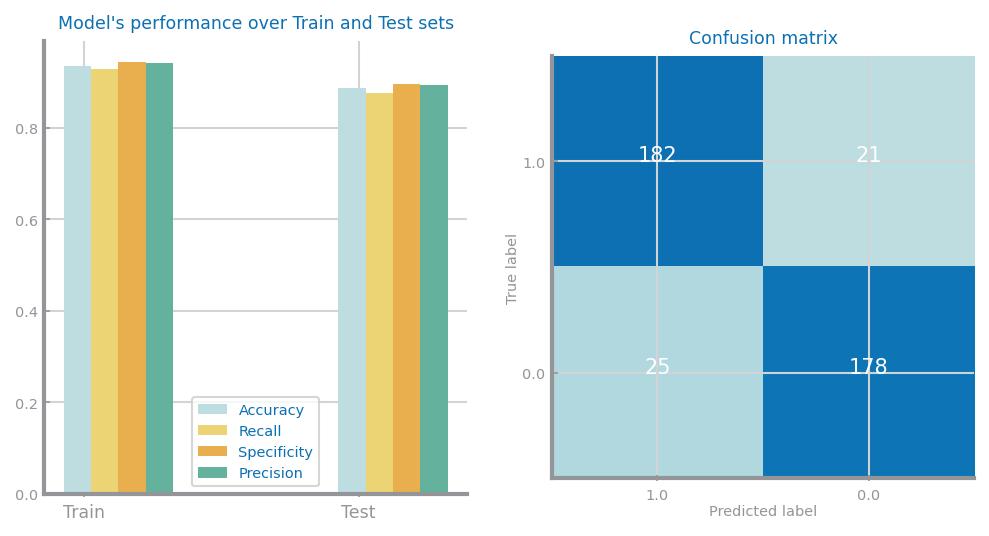

In [6]:
y_train_all = []
prd_train_all = []
y_test_all = []
prd_test_all = []

for i in range(NUM_SPLITS):
    y_train_all.extend(splits[i]['y_train'])
    prd_train_all.extend(split_best_tree[i].predict(splits[i]['X_train']))
    y_test_all.extend(splits[i]['y_test'])
    prd_test_all.extend(split_best_tree[i].predict(splits[i]['X_test']))
    
ds.plot_evaluation_results(labels, y_train_all, prd_train_all, y_test_all, prd_test_all, showXTickLabels=True)

<Figure size 600x450 with 0 Axes>

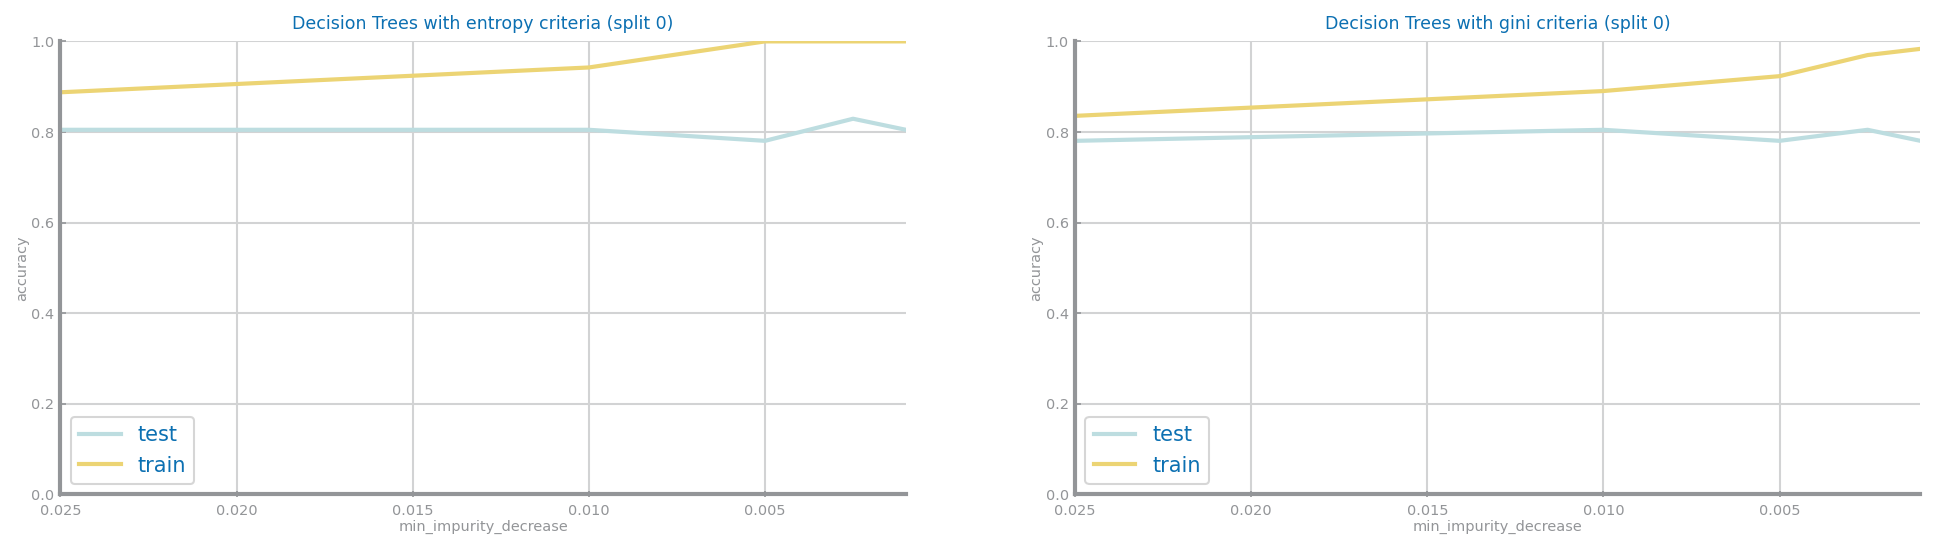

<Figure size 600x450 with 0 Axes>

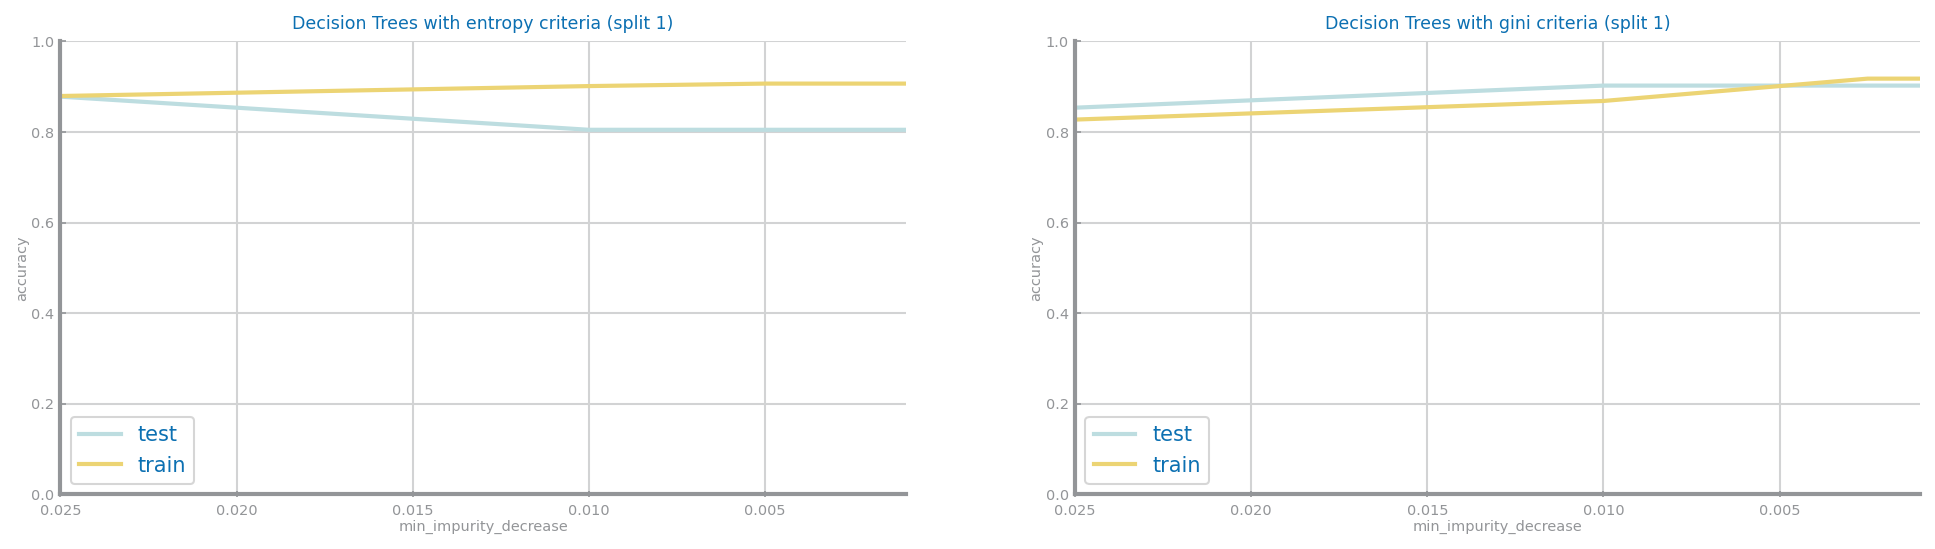

<Figure size 600x450 with 0 Axes>

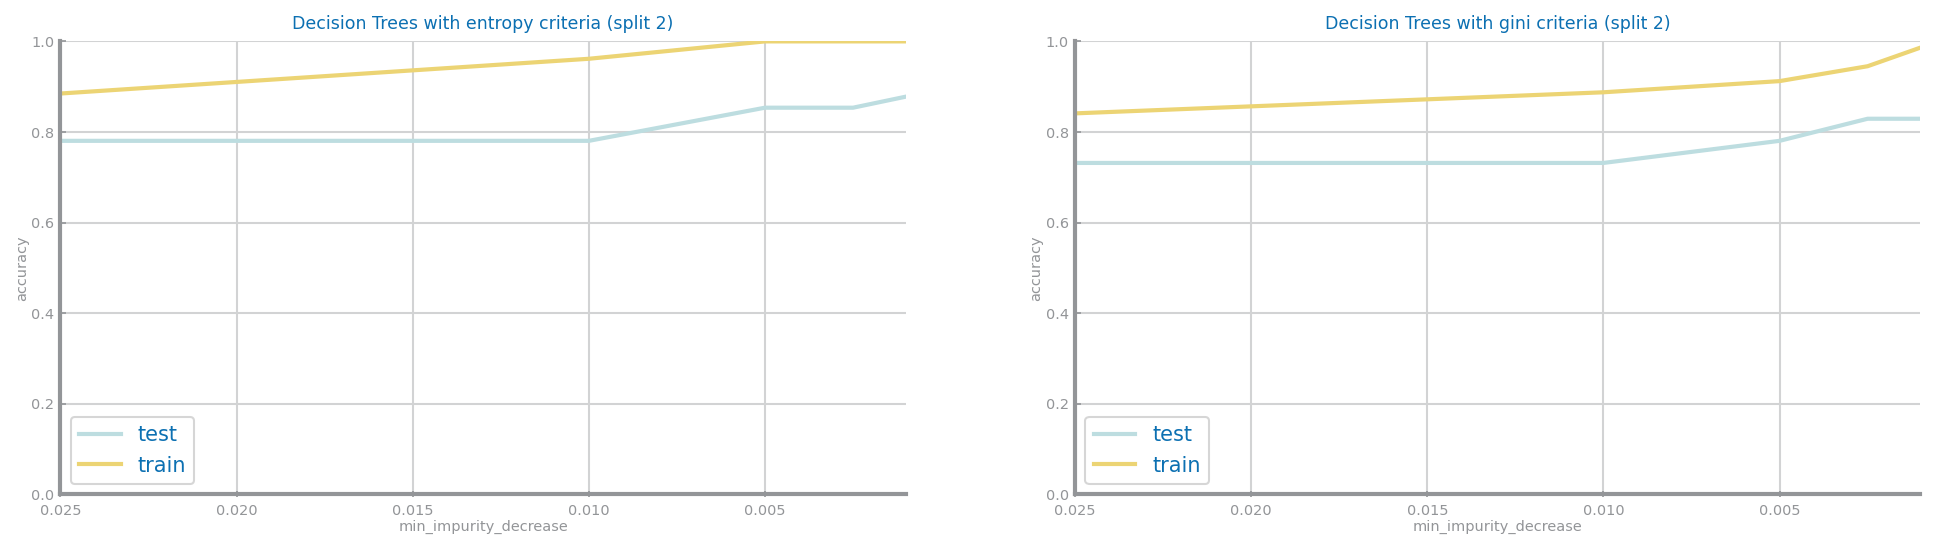

<Figure size 600x450 with 0 Axes>

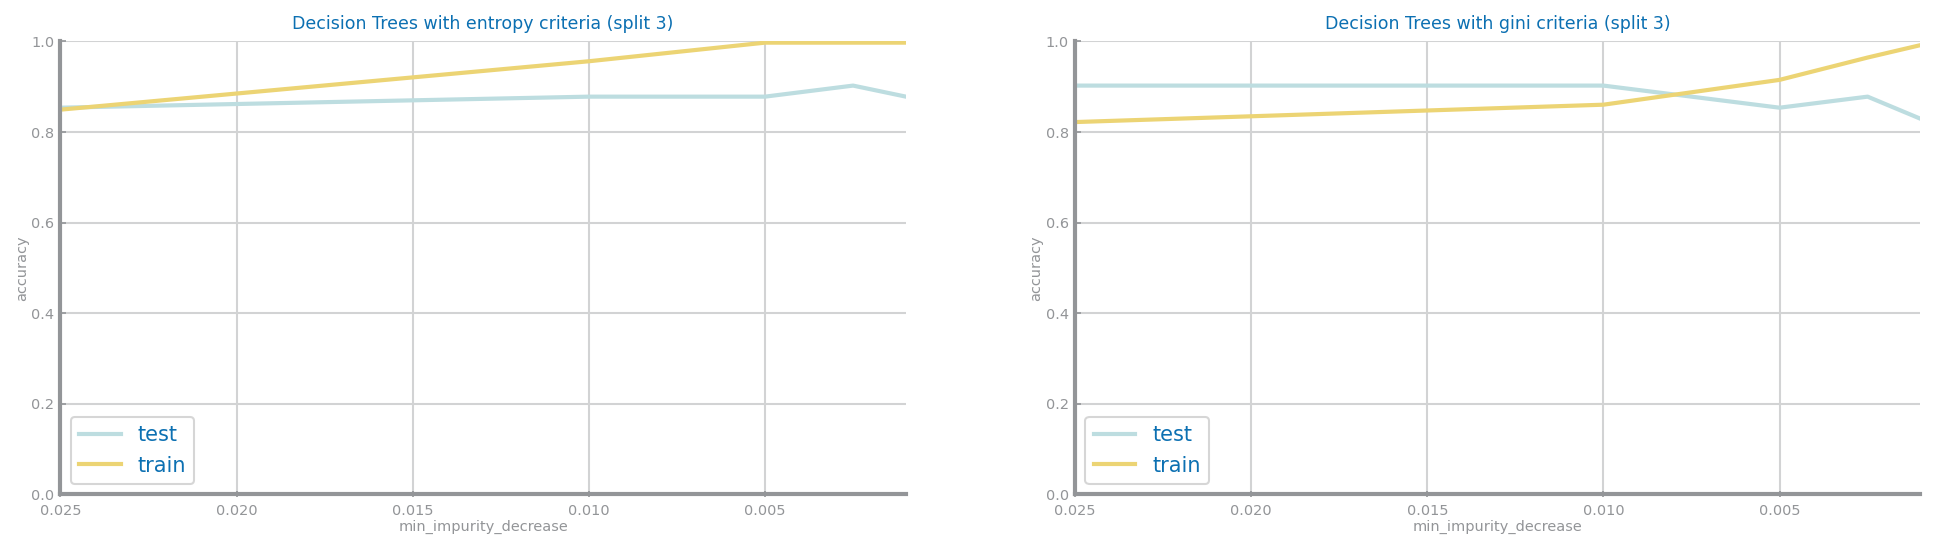

<Figure size 600x450 with 0 Axes>

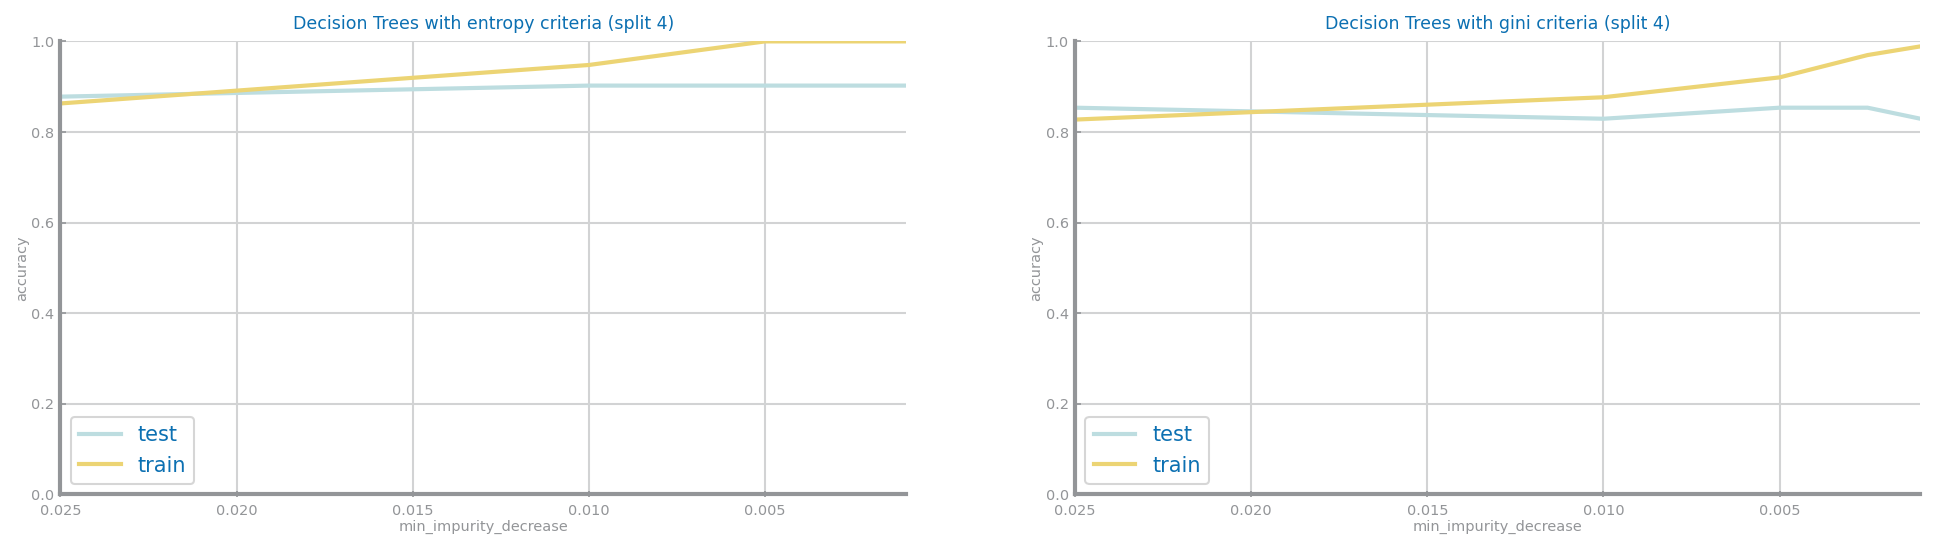

<Figure size 600x450 with 0 Axes>

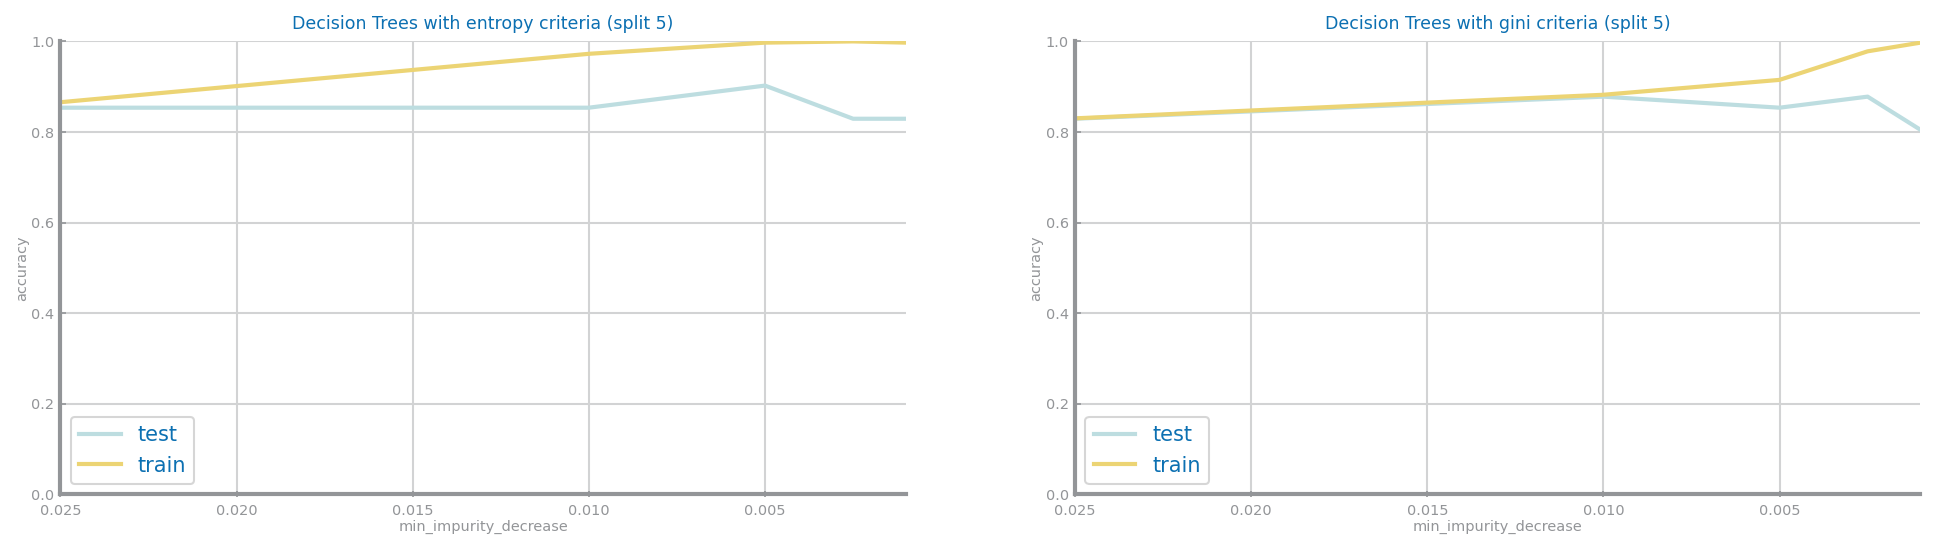

<Figure size 600x450 with 0 Axes>

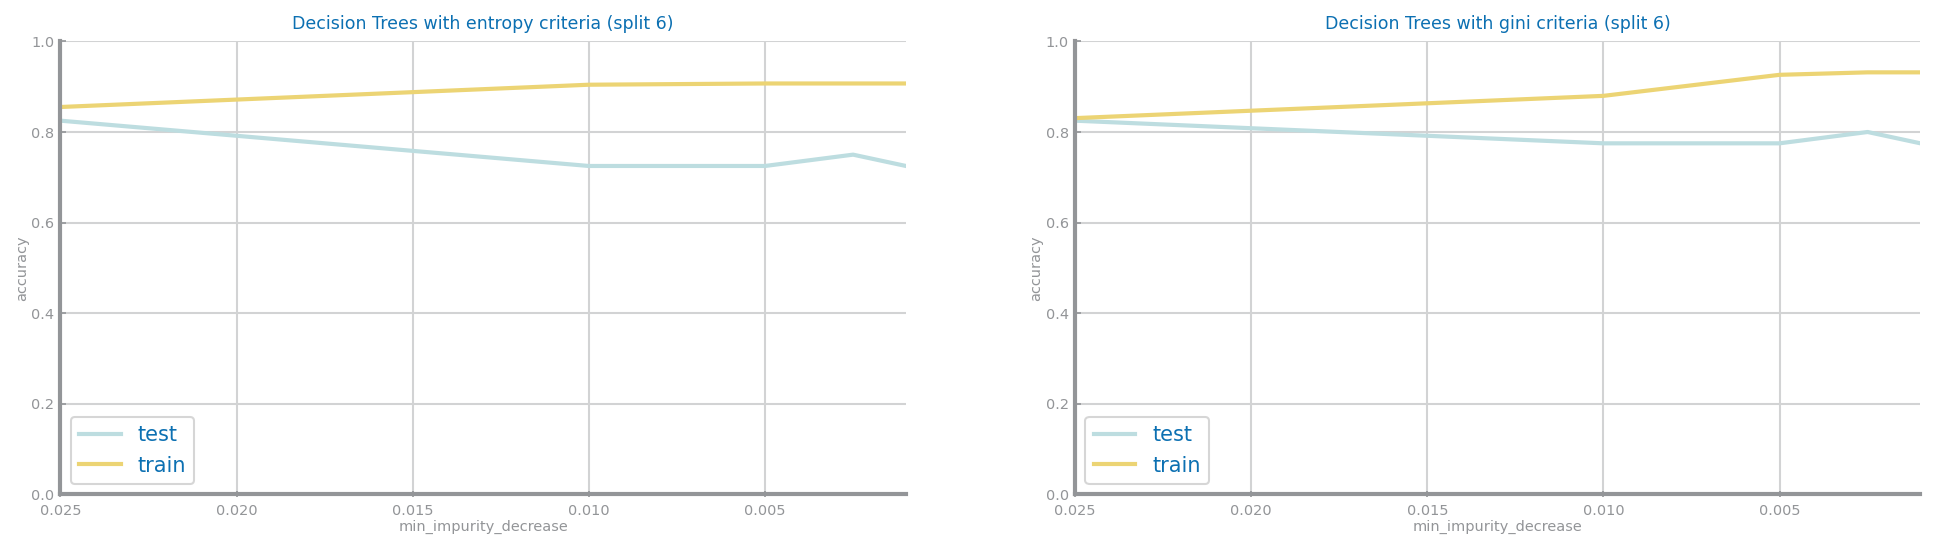

<Figure size 600x450 with 0 Axes>

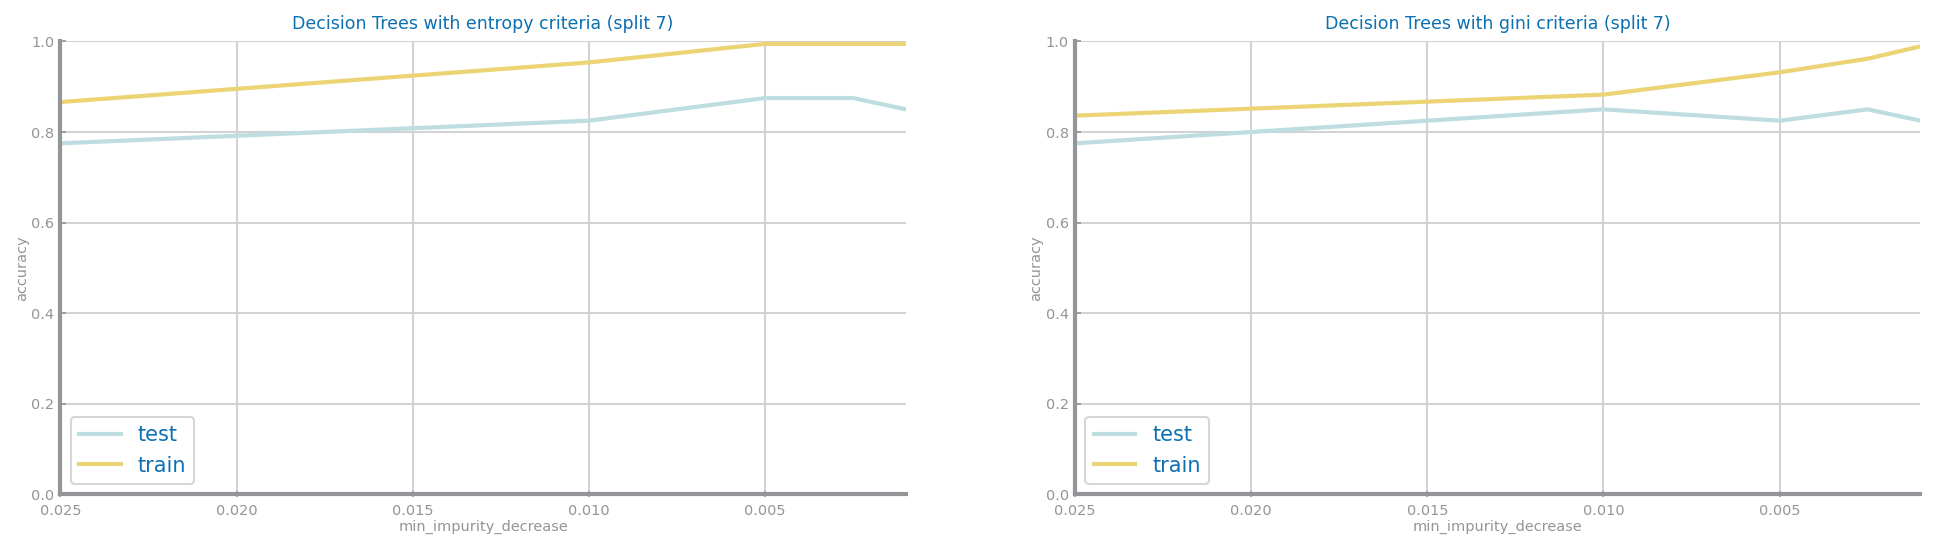

<Figure size 600x450 with 0 Axes>

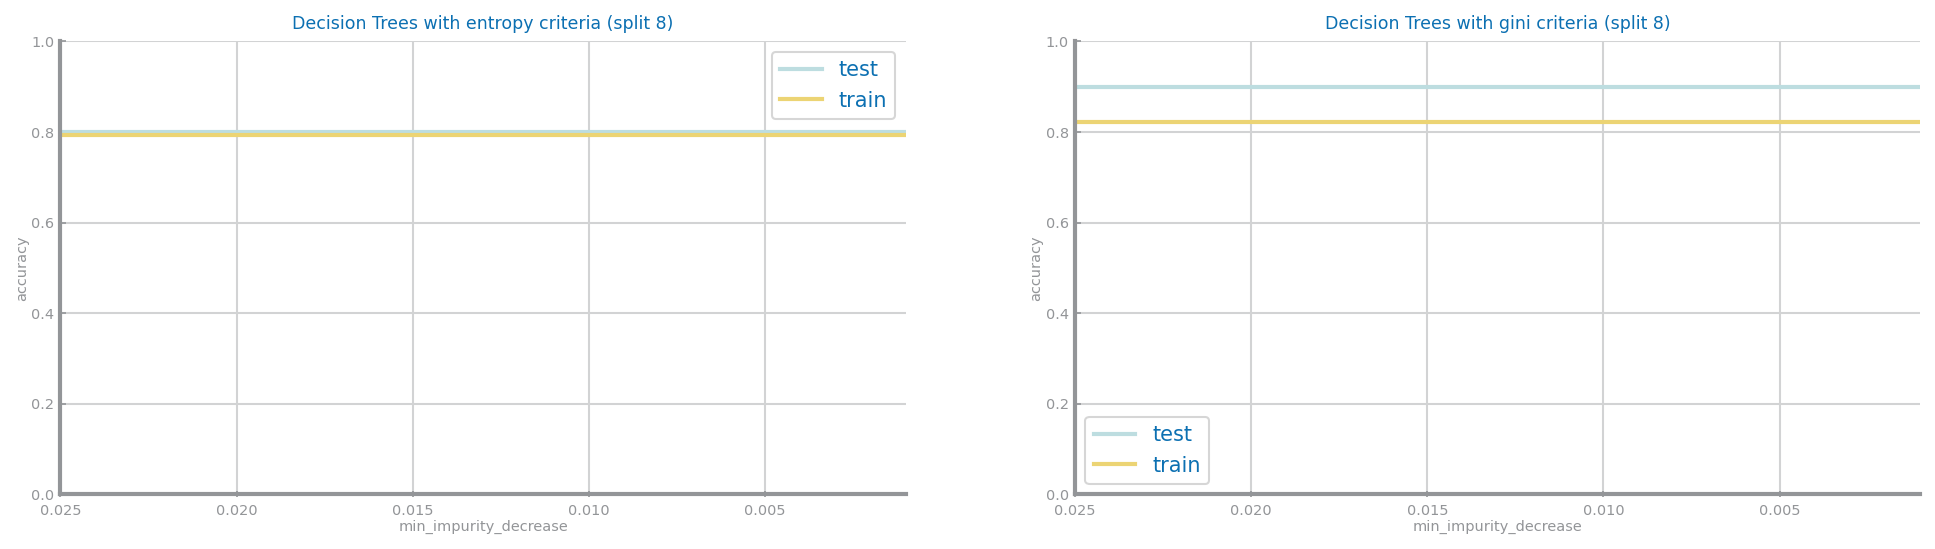

<Figure size 600x450 with 0 Axes>

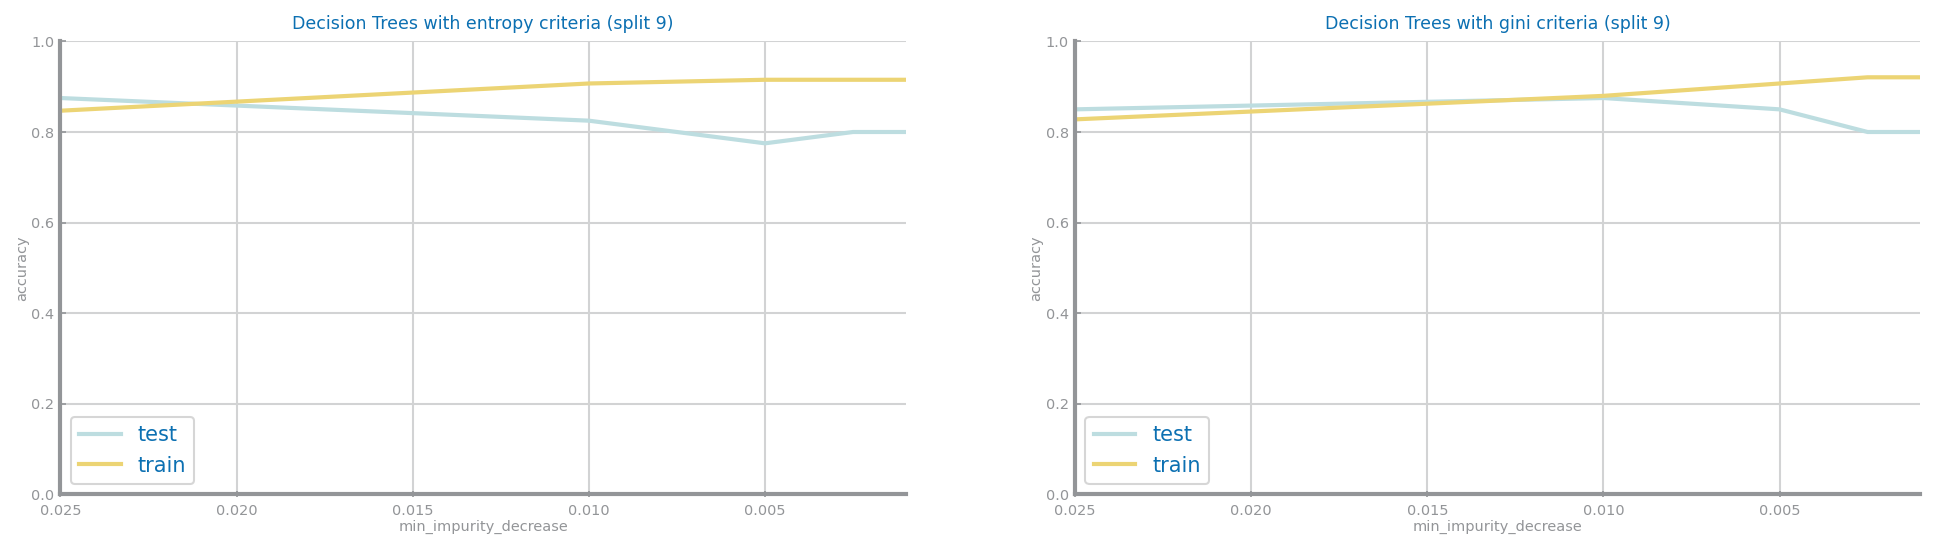

In [7]:
for i in range(NUM_SPLITS):
    d = split_best[i][1]
    plt.figure()
    fig, axs = plt.subplots(1, len(criteria), figsize=(16, 4), squeeze=False)
    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        yvalues = []
        yvalues_train = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(splits[i]['X_train'], splits[i]['y_train'])
            prdY = tree.predict(splits[i]['X_test'])
            prdY_train = tree.predict(splits[i]['X_train'])
            yvalues.append(metrics.accuracy_score(splits[i]['y_test'], prdY))
            yvalues_train.append(metrics.accuracy_score(splits[i]['y_train'], prdY_train))
        values['test'] = yvalues
        values['train'] = yvalues_train
        ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria (split %d)'%(f, i),
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

    plt.show()

### Summary

---

- ***How do models improve with the increase of max_depth?***

Overall, they tend to decrease accuracy. 2 seems to be the most consistent best value for depth, even though 5 and 10 were the best depths for some splits.

- ***How does performance change with decrease of min_impurity_decrease?***

Performance decreases with the decrease of min_impurity_decrease for all depths except 2 that stays the same.

- ***How do different criteria impact the model performance?***

Entropy achieves the best results when dealing with higher min_impurity_decrease but as we decrease it, gini performance decreases slower than entropy's and seems to be more stable.

- ***What is the best parametrisation (criteria, max_depth and min_impurity_decrease)?***

Best results achieved in split 3 with entropy criteria, depth=10 and min_impurity_decrease=0.002500 ==> accuracy=0.926829

- ***Is the accuracy achieved good enough?***

Most of the cases yes but we still have some not so good accuracies (~0.76).

- ***What is the largest kind of errors?***

False negatives.

- ***Is it possible to identify overfitting?***

Some cases yes, others no.